# THE SPARK FOUNDATION INTERNSHIP
Name: Vedant Dadurwade

Domain: Computer Vision & IOT

I have used KMeans Clustering Algorithm for colors Detection in images

**Importing Libraries**

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

**Reading image**

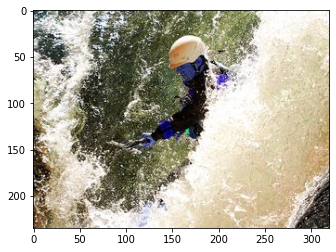

In [3]:
image = cv2.imread('2.jpg')
plt.imshow(image)
plt.show()

**Checking Type and Shape of image Data**

In [4]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

The type of this input is <class 'numpy.ndarray'>
Shape: (235, 320, 3)


**Converting BGR-To-RGB**

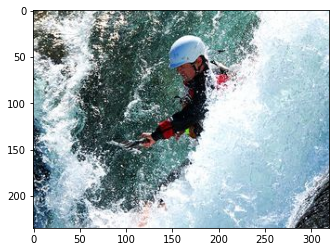

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

**Converting Image to GrayScale**

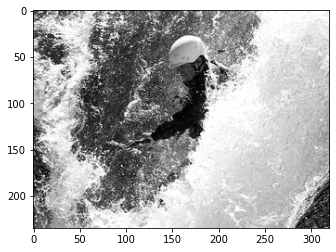

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

**Resizing Images**

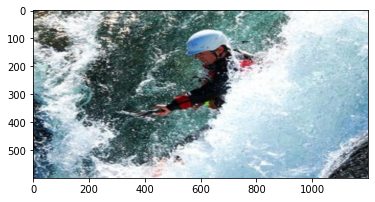

In [7]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
plt.show()

**Let us start color Identification**

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

**Defining method for getting images & Conversion from BGR-TO-RGB**

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

**Defining method along with K_Means Algorithm**

In [10]:
def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

**Calling Above Two Functions inside each other**

[array([238.52574652, 245.72714982, 248.95333225]),
 array([111.73030038, 138.44574267, 142.33911403]),
 array([23.10996183, 30.15614802, 31.47369877]),
 array([170.38977803, 198.90519588, 211.92364735]),
 array([50.56829525, 68.27796829, 67.37605677]),
 array([ 80.69748436, 103.04201251, 103.53913932]),
 array([203.82032696, 222.59614632, 231.28472349]),
 array([142.0033548 , 171.74854433, 184.44036556])]

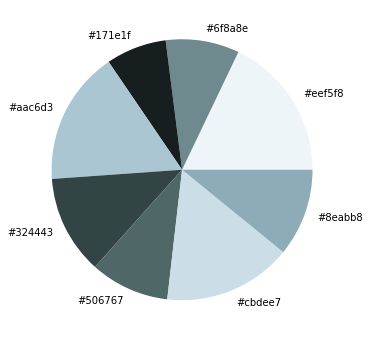

In [12]:
get_colors(get_image('2.jpg'), 8, True)

**Search images using Color**

In [24]:
IMAGE_DIRECTORY = 'images'

COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0]}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

**Visualization of Data**

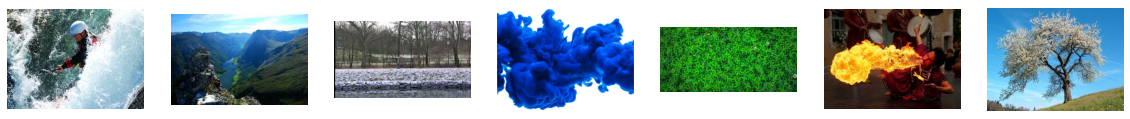

In [25]:
plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')

**Function for finding matches by using top 10 colors in images**

In [26]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image

**Function for selection of images (Match/Mismatch)**

In [27]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            plt.axis('off')
            index += 1

**Calling above methods and visualizing results**

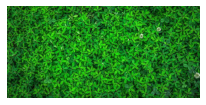

In [28]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['GREEN'], 60, 5)

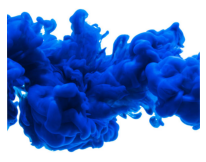

In [29]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

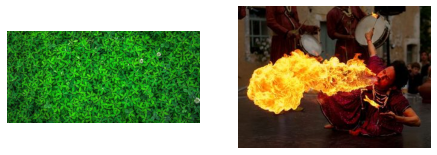

In [30]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

# Conclusion

I have used KMeans Clustering Algorithm to extract majority colors from images.

then I used the RGB Values of Colors to identify images from a collection that have that color in them.